In [1]:
from rocketpy.motors import LiquidMotor, CylindricalTank, TankGeometry
from rocketpy.motors.Tank import  MassFlowRateBasedTank
from rocketpy.motors import Fluid
from rocketpy import Function

from math import exp

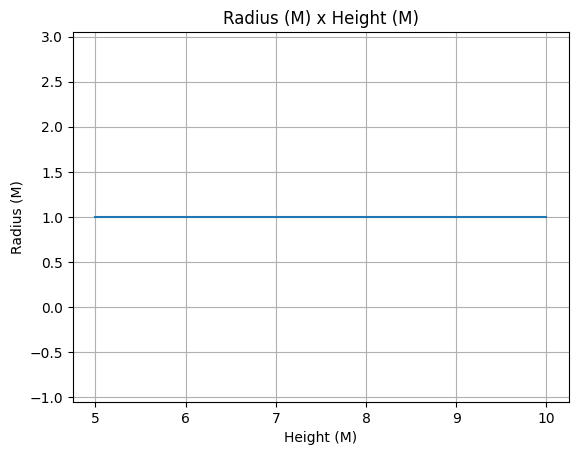

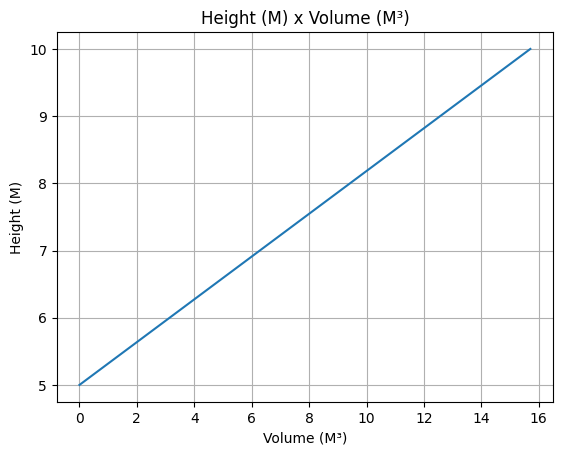

In [2]:
tanks_shape = CylindricalTank(0.1, 1, True)
tanks_shape = TankGeometry({(5,10) : 1})

tanks_shape.radius.plot(equalAxis=True)
tanks_shape.inverse_volume.plot()

/home/phmb/github/RocketPy/rocketpy/Function.py:2132: RuntimeWarning: invalid value encountered in divide
  Ys = self.source[:, 1] / other.source[:, 1]


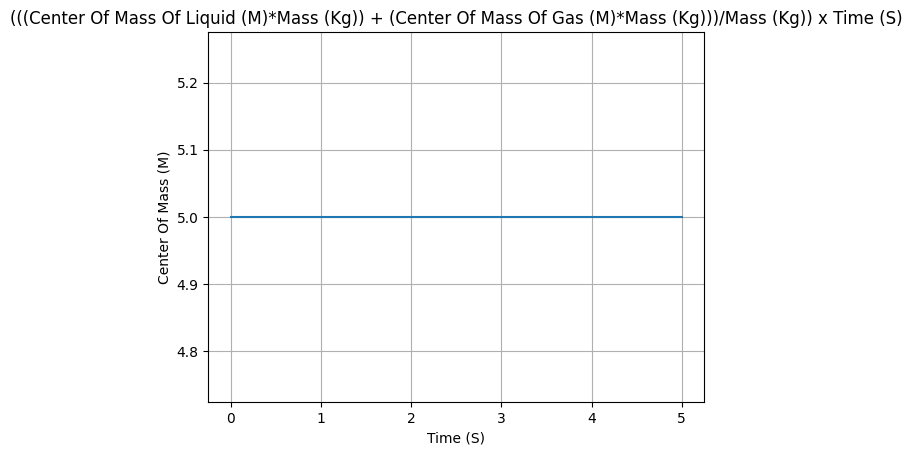

In [3]:
oxidizer_liq = Fluid(name="N2O_l", density=1220, quality=1)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277, quality=1)
fuel_liq = Fluid(name="ethanol_l", density=789, quality=1)
fuel_gas = Fluid(name="ethanol_g", density=1.59, quality=1)

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tanks_shape,
    flux_time=(0,5),
    initial_liquid_mass=0,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=Function(0).setDiscrete(0,5,100),
    liquid_mass_flow_rate_out=Function(0).setDiscrete(0,5,100),
    gas_mass_flow_rate_in=Function(0).setDiscrete(0,5,100),
    gas_mass_flow_rate_out=Function(0).setDiscrete(0,5,100),
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
    discretize=None,
)

fuel_tank = MassFlowRateBasedTank(
    name="fuel tank",
    geometry=tanks_shape,
    flux_time=(0,5),
    initial_liquid_mass=0,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=Function(0).setDiscrete(0,5,100),
    liquid_mass_flow_rate_out=Function(0).setDiscrete(0,5,100),
    gas_mass_flow_rate_in=Function(0).setDiscrete(0,5,100),
    gas_mass_flow_rate_out=Function(0).setDiscrete(0,5,100),
    liquid=fuel_liq,
    gas=fuel_gas,
    discretize=None,
)

fuel_tank.centerOfMass()


In [4]:
liquid_motor = LiquidMotor(
    thrustSource=4000,
    burnOut=5,
    nozzleRadius=0.15
)

liquid_motor.addTank(oxidizer_tank, 0.6)
liquid_motor.addTank(fuel_tank, 1.8)


Motor Details
Total Burning Time: 5 s
Total Propellant Mass: 0.000 kg
Propellant Exhaust Velocity: inf m/s
Average Thrust: 4000.000 N
Maximum Thrust: 4000.0 N at 0.0 s after ignition.
Total Impulse: 20000.000 Ns

Plots


/home/phmb/github/RocketPy/rocketpy/motors/Motor.py:262: RuntimeWarning: divide by zero encountered in scalar divide
  return self.totalImpulse / self.propellantInitialMass


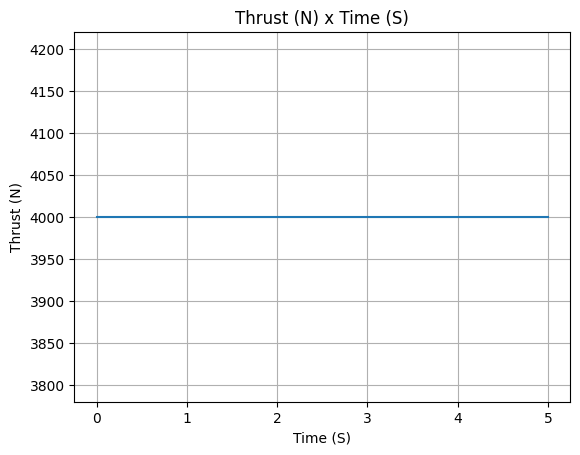

In [5]:
liquid_motor.info()

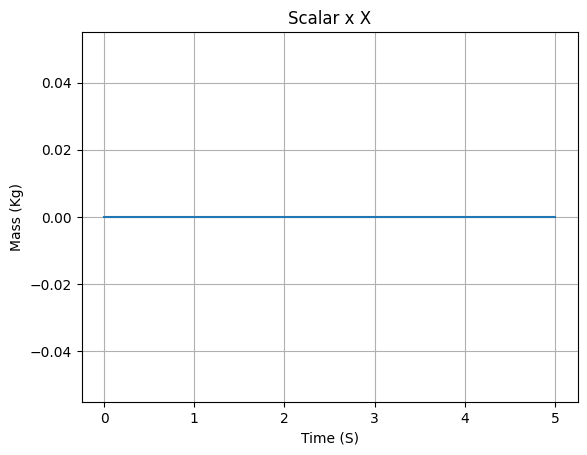

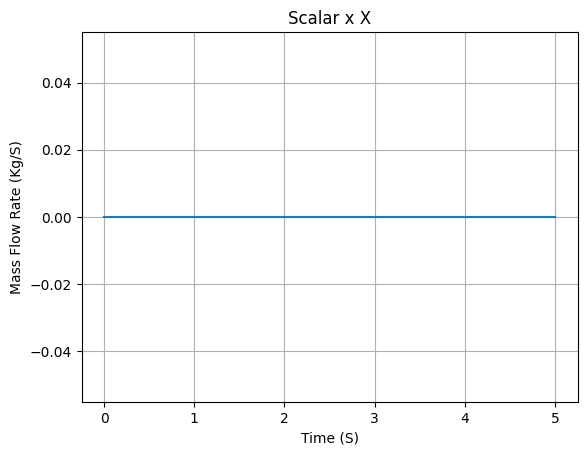

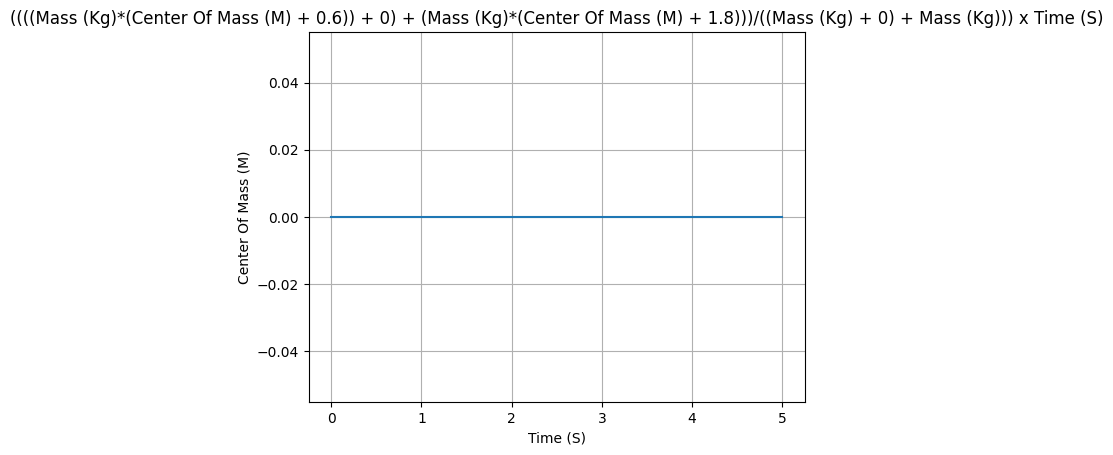

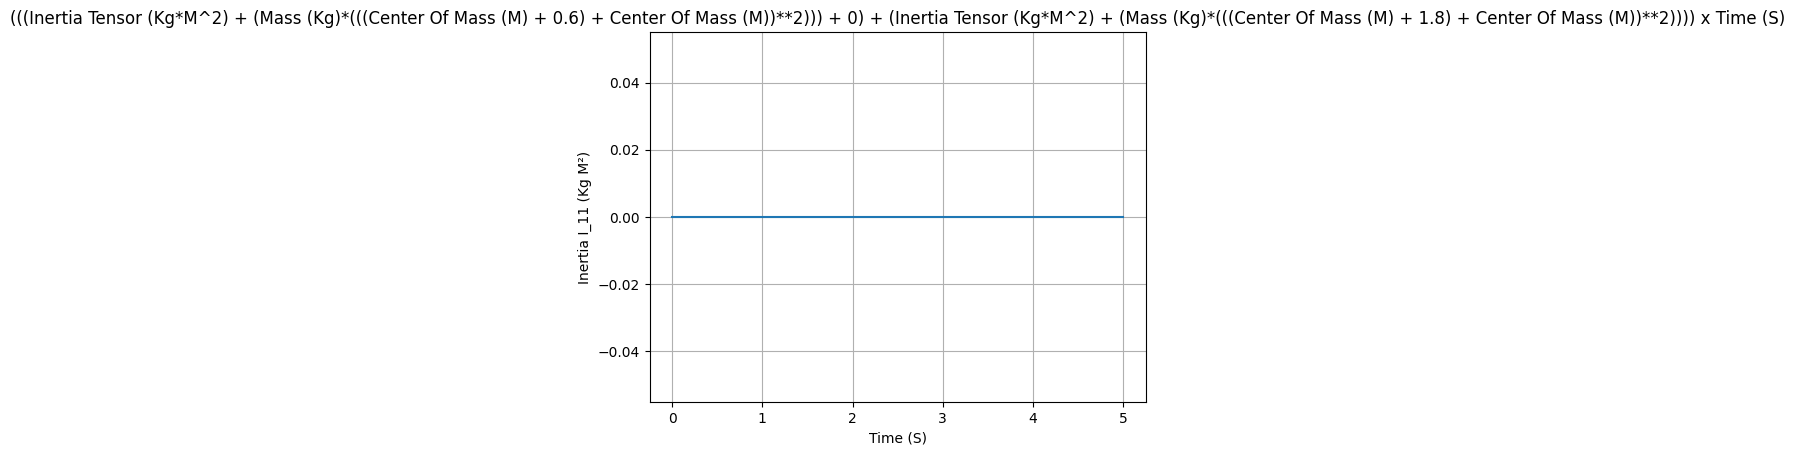

In [6]:
liquid_motor.mass.plot(0,5)
liquid_motor.massFlowRate.plot(0,5)

liquid_motor.centerOfMass.plot(0,5,)
liquid_motor.I_11.plot(0,5)